In [133]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import utils
fontsize = 16


sns.set_context("paper", rc={
    "font.size": fontsize,
    "axes.titlesize": fontsize,
    "axes.labelsize": fontsize,
    "xtick.labelsize": fontsize,
    'ytick.labelsize': fontsize,
    'grid.linewidth': 1.5,
})
sns.set_style("ticks", {"xtick.major.size": 14, "ytick.major.size": 14})

plt.rc('font', family='Times New Roman', weight='bold', size=fontsize)
# plt.rc('lines', lw=3.5)
plt.rcParams.update(
    {'font.size': fontsize, "axes.grid": True, 'grid.linestyle': '-.'})


path_mac = "."
path_linux = "."
PATH = utils.get_data_path(path_mac=path_mac, path_linux=path_linux)

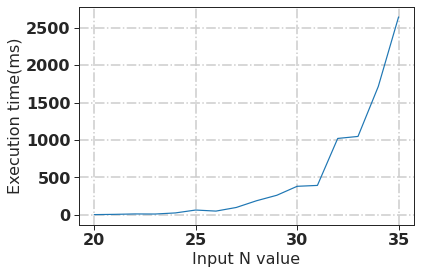

In [134]:
"""
input_n -> exec_time mapping relationhip with amplification
One can generated this relationship by manually setting input_n values
"""
exec_time_baseline = {
    20: 3.0007362365722656,
    21: 6.445169448852539,
    22: 11.99650764465332,
    23: 10.837554931640625,
    24: 25.562047958374023,
    25: 64.16678428649902,
    26: 50.01401901245117,
    27: 98.37031364440918,
    28: 188.27342987060547,
    29: 261.45052909851074,
    30: 380.95855712890625,
    31: 392.9123878479004,
    32: 1020.2226638793945,
    33: 1046.9481945037842,
    34: 1713.9770984649658,
    35: 2642.3959732055664
}
plt.plot(exec_time_baseline.keys(), exec_time_baseline.values())
plt.xlabel("Input N value")
plt.ylabel("Execution time(ms)")
plt.show()

### 每一种策略的 执行时间 受 Dispatch_intervel 的影响

In [135]:
import numpy as np
all_csvs = list(
    map(lambda x: f'{x.split(".csv")[0]}', glob.glob(f"{PATH}/latency*.csv")))
strategies = ['BaseBatching', "Kraken", "SFS",  "n_Batching"]
legends = ['BaseBatching', "Kraken", "SFS",  "FaaSBatch"]
strategy_csvs = {
    strategy: list(filter(lambda x: strategy in x, all_csvs)) for strategy in strategies
}

data = pd.DataFrame()
for strategy, csvs in strategy_csvs.items():
    for csv in csvs:
        df = pd.read_csv(f"{csv}.csv")
        dispatch_interval = csv.split("_")[-1]
        df['dispatch_interval'] = dispatch_interval
        if strategy == 'n_Batching':
            df['strategy'] = "FaaSBatch"
        else:
            df['strategy'] = strategy
        data = pd.concat([df, data])


In [136]:
def bar_plot(y, y_label):
    fig, ax1 = plt.subplots(figsize=(9, 2.5))
    sns.barplot(x="dispatch_interval", y=y, hue="strategy", hue_order=legends,
                data=data, palette="Blues", order=sorted(data['dispatch_interval'].unique()), estimator=lambda x: np.quantile(x, 0.98))
    sns.move_legend(ax1, "lower center", bbox_to_anchor=(.5, 1),
                    ncol=4, title=None, frameon=False, fontsize=fontsize-4)
    ax1.set_ylabel(y_label)
    ax1.set_xlabel("Dispatch interval (s)")
    fig.show()

data['exec_time(s)'] = data['exec_time(ms)'] / 1000 # Converts ms to s
data['round_trip(s)'] = (data['exec_time(ms)'] + data['queue_time(ms)'])/ 1000
data['schedule_time(s)'] = data['schedule_time(ms)'] / 1000 # Converts ms to s



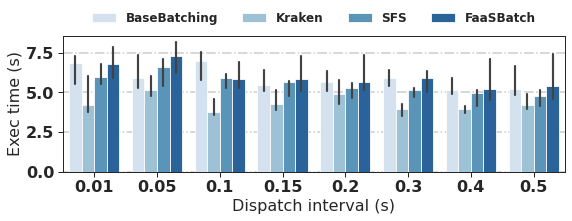

In [137]:
bar_plot("exec_time(s)", y_label="Exec time (s)")

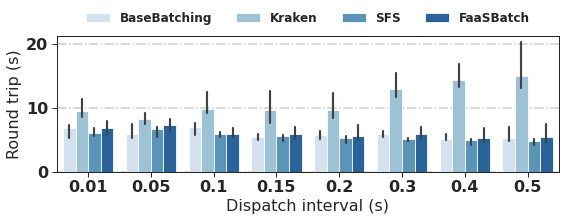

In [138]:
bar_plot("round_trip(s)", y_label="Round trip (s)")

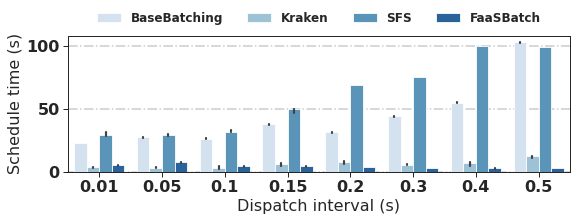

In [139]:
bar_plot("schedule_time(s)", y_label="Schedule time (s)")

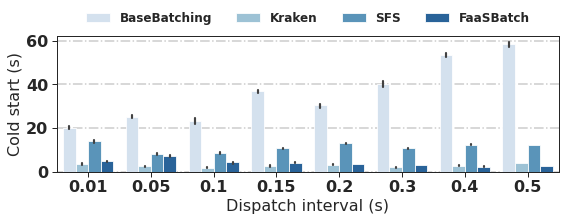

In [140]:
data['cold_start(s)'] = data['cold_start(ms)'] / 1000 # Converts ms to s
bar_plot("cold_start(s)", y_label="Cold start (s)")